# Escalamiento, Normalización y Estandarización de los datos

Para este concepto, partiremos de un ejemplo de un dataset que consiste en datos de personas en referencia a dos características (columnas): el salio y la cantidad de autos (carros).

Si nosotros introducimos este dataset en particular a un algoritmo de aprendizaje de máquina y el mismo detecta que la columna de carros varía con valores de 0, 1, 2, 3 como mucho, contra los valores de los salario que pueden ir de 2000 a 10000, a 15000, a 30000, llegaría a la conclusión de que puede resultar más "interesante" la información relacionada al salario que a la cantidad de carros, solo por el hecho de que la variación entre los valores es mucho mayor. De esta manera, se estaría incurriendo a un tipo de sesgo, en el que solo se considera para el análisis una parte de los datos, descartando otra que puede ser igual de relevante.

Por este motivo, para evitar que se den situaciones de esta índole, se aplica lo que se conoce como *escalamiento, normalización o estadarización*. Esto es, tomar los datos y llevarlo a una escala uniforme y homogénea para todos, por ejemplo, tomando el 0 como mínimo y el 1 como máximo, y el resto de los valores se hallarán dentro de este rango.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
datos = pd.read_csv("../datos/datos_personas.csv")
datos

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1
...,...,...
995,9998.522402,0
996,6867.097603,2
997,9757.539280,1
998,11044.031510,1


## Graficando los datos en escala original

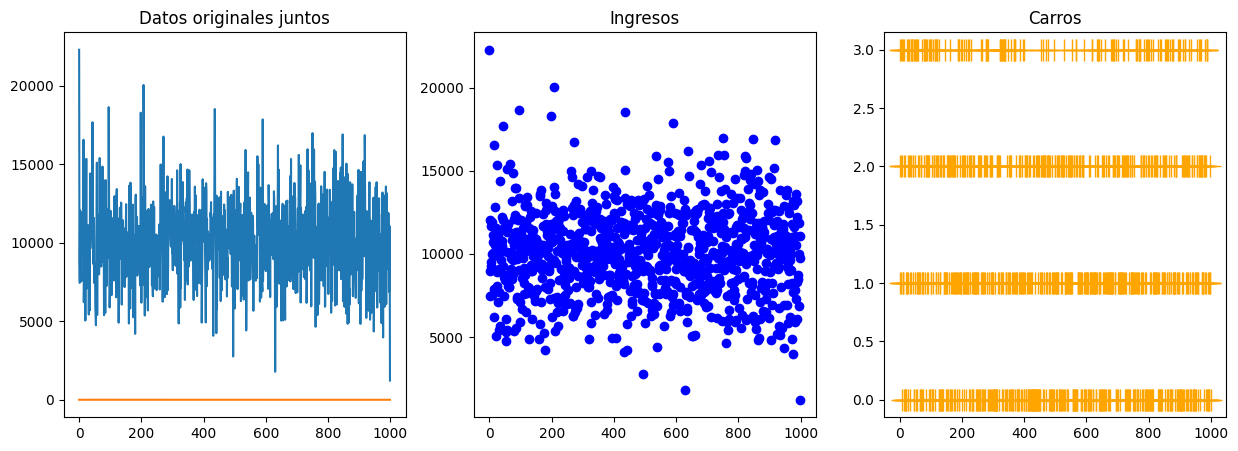

In [5]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1) # 1 fila, 3 columnas (3 graficos en esa fila), nro de grafico de la figura
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.set_title("Datos originales juntos")
ax1.plot(datos) # una linea por cada columna, con cant de observaciones en eje x
ax2.set_title("Ingresos")
ax2.plot(datos["ingreso"], linewidth=0, marker="o", color="blue", markersize=6)
ax3.set_title("Carros")
ax3.plot(datos["carros"], linewidth=0, marker="+", color="orange", markersize=16)
plt.show()

En la primer gráfica se ve claramente lo que se comentó más arriba. Es decir, los números más pequeños, que es el de los carros, se tornan casi imperceptibles, mientras que los de los ingresos marcan una clara diferencia y varianza entre sí, motivo por el cual un modelo de aprendizaje de máquina podría considerar como más relevantes los datos de los ingresos (pese a que no debería ser así).

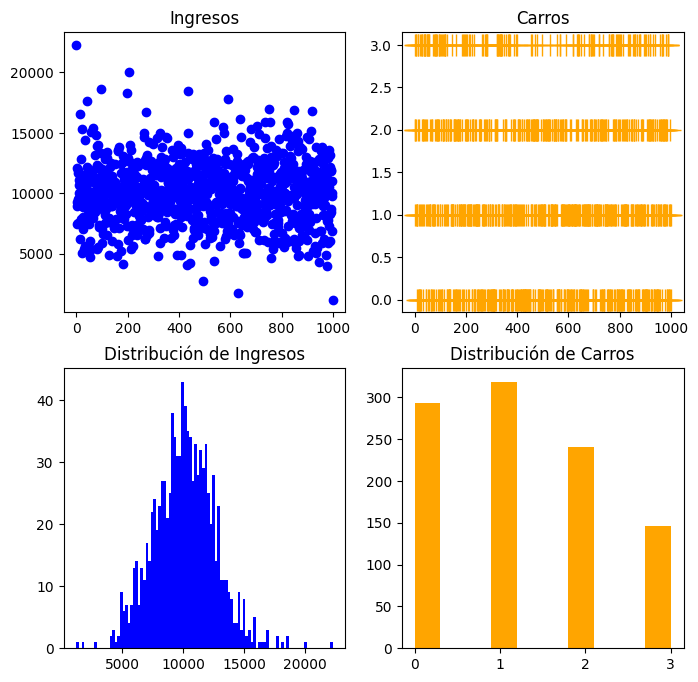

In [8]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2, 2, 1) # 2 fila, 2 columnas (2 graficos en esa fila), nro de grafico de la figura
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.set_title("Ingresos")
ax1.plot(datos["ingreso"], linewidth=0, marker="o", color="blue", markersize=6)
ax2.set_title("Carros")
ax2.plot(datos["carros"], linewidth=0, marker="+", color="orange", markersize=16)
ax3.set_title("Distribución de Ingresos")
ax3.hist(datos["ingreso"], bins=100, color="blue")
ax4.set_title("Distribución de Carros")
ax4.hist(datos["carros"], color="orange")
plt.show()

# Estandarizadores

## **Escala** en función del Mínimo y Máximo

In [19]:
datos_min_max = preprocessing.MinMaxScaler().fit_transform(datos)
datos_min_max 
# 0 -> hace referencia a valor minimo de ingreso, valor minimo de carros
# 1 -> hace referencia al valor maximo de ingreso, valor maximo de carros

# Formula:
# valor escalado = (valor - min) / (max - min)

array([[1.        , 1.        ],
       [0.36761553, 0.33333333],
       [0.29526521, 0.66666667],
       ...,
       [0.40545125, 0.33333333],
       [0.46656343, 0.33333333],
       [0.        , 0.        ]])

### Teoría

Texto de `ChatGPT`:

### Función `MaxMinScaler` de `sklearn.preprocessing`

La función **`MaxMinScaler`** de `sklearn.preprocessing` es una técnica de escalado de datos que transforma las características de un conjunto de datos para que estén dentro de un rango específico, generalmente entre 0 y 1. Este proceso de escalado es útil cuando se aplican algoritmos de machine learning que dependen de la escala de los datos, como los métodos de optimización basados en gradientes o algoritmos que calculan distancias, como k-NN (k-Nearest Neighbors) y SVM (Support Vector Machines).

#### ¿Cómo funciona?

La fórmula que utiliza **`MaxMinScaler`** para escalar cada característica de los datos es la siguiente:

$X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$

- **$X$**: Es el valor original (o mejor dicho, uno de los valores originales) de la característica (columna).
- **$X_{\text{min}}$**: Es el valor mínimo de la característica en el conjunto de datos.
- **$X_{\text{max}}$**: Es el valor máximo de la característica en el conjunto de datos.
- **$X'$**: Es el valor transformado después de la normalización, que estará entre 0 y 1.

#### Propósito

La idea es reducir la magnitud de las características a un rango común, lo que puede mejorar la convergencia de los algoritmos de machine learning que son sensibles a la escala de los datos. Al escalar las características de esta forma, se evita que las características con valores más grandes dominen el aprendizaje de los modelos.

#### Parámetros

1. **`feature_range`**: *(min, max)*, el rango en el que deseas escalar los datos. El valor predeterminado es (0, 1), pero puedes ajustarlo para que los datos estén en cualquier intervalo de tu elección.
2. **`copy`**: Si se establece en `True`, los datos originales no se modifican y se genera una copia escalada. Si se establece en `False`, los datos originales se modifican en su lugar.
3. **`clip`**: Si se establece en `True`, los valores fuera del rango especificado se recortan (se limitan).

#### Ejemplo

```python
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Datos de ejemplo
data = np.array([[1, 2], [3, 4], [5, 6]])

# Inicializar el escalador
scaler = MinMaxScaler()

# Ajustar y transformar los datos
scaled_data = scaler.fit_transform(data)

print(scaled_data)
```

Salida esperada:
```
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]
```

En este caso, los datos originales han sido escalados al rango [0, 1].

#### Usos comunes
* Reducción de sesgo: El escalado evita que las características con valores numéricos más grandes tengan un impacto desproporcionado en el modelo.
* Convergencia de algoritmos de optimización: Muchos algoritmos (como regresión logística, redes neuronales y máquinas de soporte vectorial) se benefician del escalado para converger más rápido.
* Algoritmos basados en distancias: Métodos como k-NN y clustering (por ejemplo, k-means) se benefician de tener las características en la misma escala, ya que dependen de cálculos de distancia (como la distancia euclidiana).

#### Consideraciones
* Sensibilidad a los outliers: Si hay valores atípicos en los datos, pueden afectar significativamente el resultado del escalado, ya que el valor mínimo o máximo de la característica puede ser extremo.
* Transformación inversa: Puedes volver a los datos originales usando el método `inverse_transform` de MinMaxScaler.

#### Resumen
En resumen, MaxMinScaler es una herramienta útil para estandarizar la escala de las características en tus datos, asegurando que todas tengan el mismo rango, lo que puede mejorar la performance y estabilidad de tus modelos de machine learning.

## Normaliza en función de la Norma del Vector

Si bien esta es otra téctica válida para, como dice su nombre, normalizar los valores de los datos, no suele ser tan utilizada porque los datos quedan muy próximos uno al otro (esto se verá mejor en las gráficas).

In [17]:
# Debemos pasar el dataframe transpuesto porque normaliza por filas y no por columnas
# Si pasamos como esta, me terminaria normalizando el valor de un ingreso con el valor de un carro y esto es incorrecto
datos_normalizer = preprocessing.Normalizer().transform(datos.T)
datos_normalizer = datos_normalizer.T
datos_normalizer

# Formula:
# valor normalizado = X / raiz cuadrada(X_1^2 + X_2^2 + X_3^2...)

array([[0.06777903, 0.05886881],
       [0.02726868, 0.01962294],
       [0.02263394, 0.03924588],
       ...,
       [0.02969242, 0.01962294],
       [0.03360725, 0.01962294],
       [0.00371935, 0.        ]])

### Función `Normalizer` de `sklearn.preprocessing`

La función **`Normalizer`** de `sklearn.preprocessing` es una técnica utilizada para normalizar las características de los datos, específicamente orientada a transformar las muestras (filas) de tal forma que cada muestra tenga una norma (longitud) unitaria.

A diferencia de otros métodos de escalado, como **`StandardScaler`** o **`MinMaxScaler`**, que modifican los valores de cada característica (columna), **`Normalizer`** actúa sobre las filas de los datos, asegurando que la norma de cada fila sea igual a 1. Esto se realiza utilizando una medida de la norma del vector, como la norma Euclidiana (L2).

#### ¿Qué hace el `Normalizer`?

El **`Normalizer`** transforma cada fila de la matriz de datos de manera que su norma se convierta en 1. La **norma** de un vector \( \mathbf{x} = (x_1, x_2, \dots, x_n) \) es una medida de su longitud, y para la norma L2, se define como:

$\|\mathbf{x} \|_2 = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$

Una vez calculada la norma de cada fila, **el `Normalizer`** divide cada componente de la fila por la norma calculada, de manera que la norma del vector resultante sea igual a 1.

#### Fórmula

Si $X$ es un vector de una muestra:

$X' = \frac{X}{\|\mathbf{x}\|}$

Donde:

- **$X$**: es la fila original del conjunto de datos.
- **$X'$**: es la fila transformada, cuya norma será 1.
- **$||X||$**: es la norma L2 de la fila, calculada como \( \sqrt{x_1^2 + x_2^2 + \dots + x_n^2} \).

#### Parámetros

La clase **`Normalizer`** tiene algunos parámetros clave que puedes ajustar:

- **`norm`**: La norma que se utilizará para normalizar las filas. Los valores posibles son:
  - `'l1'`: Normaliza las filas utilizando la norma L1 (suma de los valores absolutos de los componentes).
  - `'l2'`: Normaliza las filas utilizando la norma L2 (suma de los cuadrados de los componentes, predeterminado).
  - `'max'`: Normaliza las filas dividiendo cada valor por el valor máximo en esa fila.
  
- **`copy`**: Si es `True`, los datos se copian antes de normalizarlos. Si es `False`, los datos se modifican en su lugar.
  
#### ¿Cuándo usar el `Normalizer`?

El **`Normalizer`** es particularmente útil cuando necesitas que cada muestra en el conjunto de datos tenga una magnitud (norma) similar, especialmente cuando las relaciones entre las características de las muestras son importantes y no las magnitudes absolutas. Por ejemplo:

- **Algoritmos basados en distancias**: Métodos como **k-Nearest Neighbors (k-NN)**, **K-means** y **cosine similarity** se benefician de la normalización, ya que dependen de las distancias entre las muestras. Si las muestras tienen diferentes escalas de magnitudes, los algoritmos podrían verse influenciados por los valores más grandes, lo cual no es deseado.
- **Text Mining y Procesamiento de Lenguaje Natural (NLP)**: Cuando trabajas con vectores de características como representaciones de texto (por ejemplo, en **TF-IDF**), la normalización puede ser útil para asegurar que todas las palabras o documentos tengan la misma importancia sin que la magnitud del vector influya.


## Estandariza (se busca que el resultado tenga desv_std = 1 y media = 0)

In [26]:
datos_standard_scaler = preprocessing.StandardScaler().fit_transform(datos)
# estandarizado = (X - media) / std

datos_robust_scaler = preprocessing.RobustScaler().fit_transform(datos)
# estandarizado = (X - rango intercuartilico) / std   
# rango intercuartilico = cuantil 3 (Q3) - cuantil 1 (Q1)
# En este caso, el uso del rango intercuartilico evita que el resultado se vea afectado por los outliers, que es lo que sucede con el StandardScaler

datos_standard_scaler, datos_robust_scaler

(array([[ 4.81555174,  1.70892042],
        [-0.4413019 , -0.23193185],
        [-1.04273197,  0.73849429],
        ...,
        [-0.12678303, -0.23193185],
        [ 0.38122719, -0.23193185],
        [-3.49719763, -1.20235798]]),
 array([[ 3.70548334,  1.        ],
        [-0.3376601 ,  0.        ],
        [-0.80023109,  0.5       ],
        ...,
        [-0.09575781,  0.        ],
        [ 0.29496225,  0.        ],
        [-2.68800607, -0.5       ]]))

## Columna 'ingreso': comparación de métodos

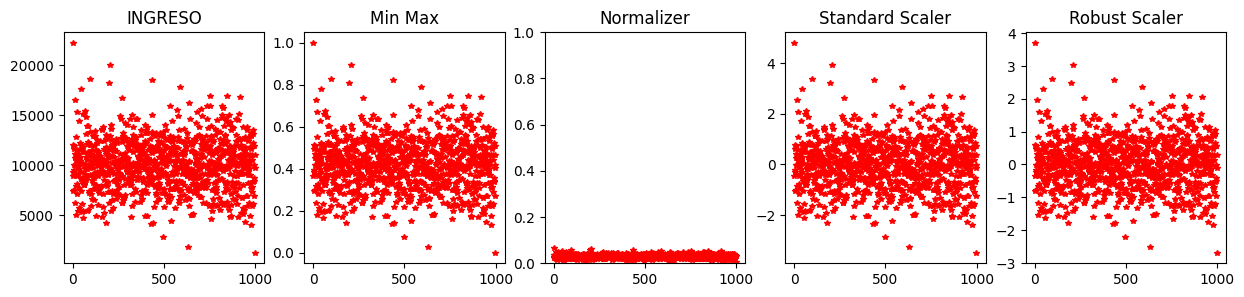

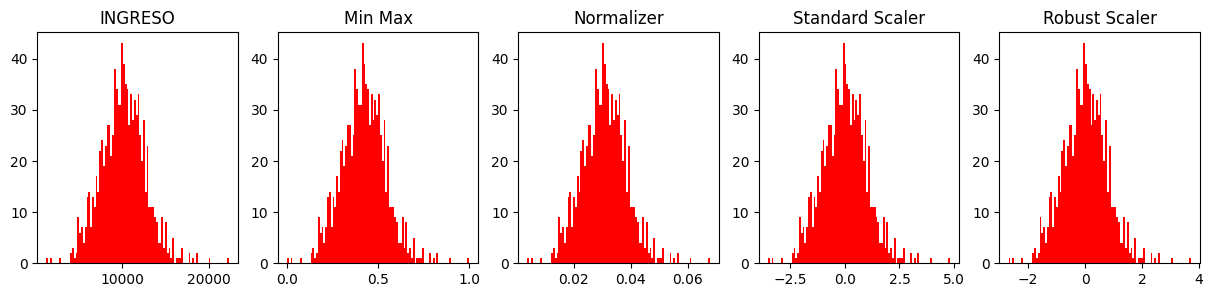

In [24]:
# convierte vectores de numpy a DataFrames para graficarlos
datos_min_max = pd.DataFrame(datos_min_max, columns=["ingreso", "carros"])
datos_normalizer = pd.DataFrame(datos_normalizer, columns=["ingreso", "carros"])
datos_standard_scaler = pd.DataFrame(datos_standard_scaler, columns=["ingreso", "carros"])
datos_robust_scaler = pd.DataFrame(datos_robust_scaler, columns=["ingreso", "carros"])

# crea una figura con 5 subfiguras para comparar los métodos
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# crea y personaliza series de datos
ax1.set_title("INGRESO")
ax1.plot(datos["ingreso"], linewidth=0, marker="*", color="red", markersize=4)

ax2.set_title("Min Max")
ax2.plot(datos_min_max["ingreso"], linewidth=0, marker="*", color="red", markersize=4)

ax3.set_title("Normalizer")
ax3.plot(datos_normalizer["ingreso"], linewidth=0, marker="*", color="red", markersize=4)
ax3.set_ylim(0, 1)

ax4.set_title("Standard Scaler")
ax4.plot(datos_standard_scaler["ingreso"], linewidth=0, marker="*", color="red", markersize=4)

ax5.set_title("Robust Scaler")
ax5.plot(datos_robust_scaler["ingreso"], linewidth=0, marker="*", color="red", markersize=4)

plt.show()

# crea una figura con 5 subfiguras para mostrar histogramas
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# crea y personaliza series de datos de los histogramas
ax1.set_title("INGRESO")
ax1.hist(datos["ingreso"], color="red", bins=100)

ax2.set_title("Min Max")
ax2.hist(datos_min_max["ingreso"], color="red", bins=100)

ax3.set_title("Normalizer")
ax3.hist(datos_normalizer["ingreso"], color="red", bins=100)

ax4.set_title("Standard Scaler")
ax4.hist(datos_standard_scaler["ingreso"], color="red", bins=100)

ax5.set_title("Robust Scaler")
ax5.hist(datos_robust_scaler["ingreso"], color="red", bins=100)

plt.show()

## Columna 'carros': comparación de métodos

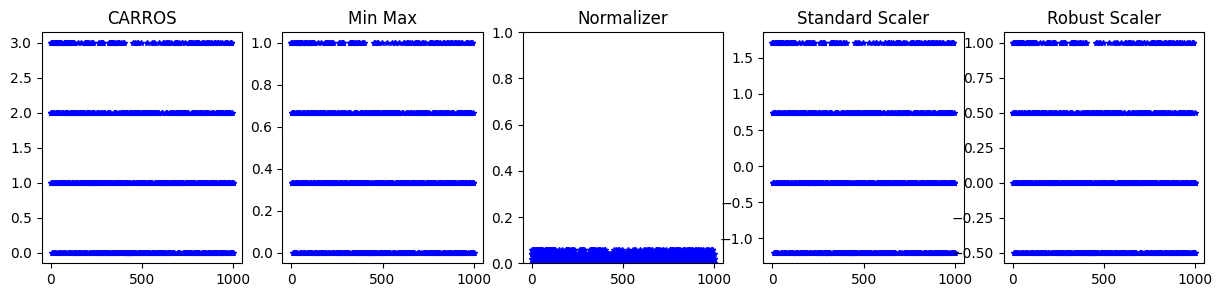

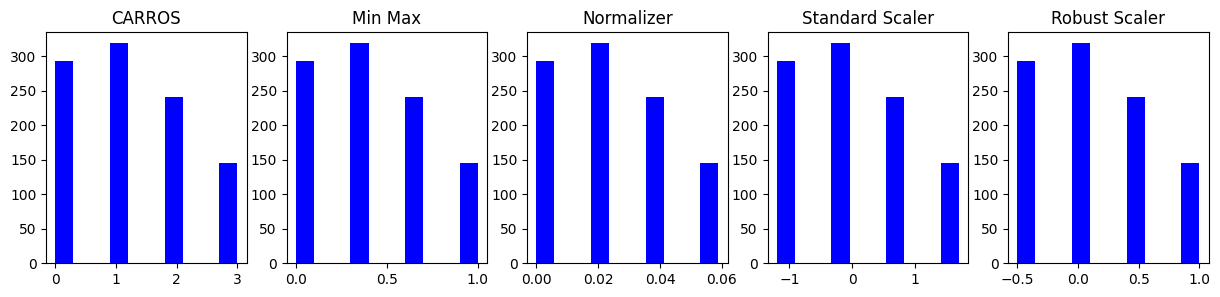

In [23]:
# crea una figura con 5 subfiguras para comparar los métodos
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# crea y personaliza series de datos
ax1.set_title("CARROS")
ax1.plot(datos["carros"], linewidth=0, marker="*", color="blue", markersize=4)

ax2.set_title("Min Max")
ax2.plot(datos_min_max["carros"], linewidth=0, marker="*", color="blue", markersize=4)

ax3.set_title("Normalizer")
ax3.plot(datos_normalizer["carros"], linewidth=0, marker="*", color="blue", markersize=4)
ax3.set_ylim(0, 1)

ax4.set_title("Standard Scaler")
ax4.plot(datos_standard_scaler["carros"], linewidth=0, marker="*", color="blue", markersize=4)

ax5.set_title("Robust Scaler")
ax5.plot(datos_robust_scaler["carros"], linewidth=0, marker="*", color="blue", markersize=4)

plt.show()

# crea una figura con 5 subfiguras para mostrar histogramas
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# crea y personaliza series de datos de los histogramas
ax1.set_title("CARROS")
ax1.hist(datos["carros"], color="blue")

ax2.set_title("Min Max")
ax2.hist(datos_min_max["carros"], color="blue")

ax3.set_title("Normalizer")
ax3.hist(datos_normalizer["carros"], color="blue")

ax4.set_title("Standard Scaler")
ax4.hist(datos_standard_scaler["carros"], color="blue")

ax5.set_title("Robust Scaler")
ax5.hist(datos_robust_scaler["carros"], color="blue")

plt.show()